In [165]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import pickle
import pandas as pd
from matplotlib import pyplot as plt
import math
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse

In [163]:

chi_data = pd.read_csv('transformed_data.csv', index_col=0, parse_dates=True).drop_duplicates()
y = new_chi_data['total_rides']
X = new_chi_data[['is_sat','is_holi','avg_precip','temp_mid','temp_rng',
                  'temp_bs','hum_mid','hum_rng','wind_mid','wind_rng','pres_mid','pres_rng']]



DatetimeIndex(['2001-01-01', '2001-01-02', '2001-01-03', '2001-01-04',
               '2001-01-05', '2001-01-06', '2001-01-07', '2001-01-08',
               '2001-01-09', '2001-01-10',
               ...
               '2018-06-19', '2018-06-20', '2018-06-21', '2018-06-22',
               '2018-06-23', '2018-06-24', '2018-06-25', '2018-06-26',
               '2018-06-27', '2018-06-28'],
              dtype='datetime64[ns]', length=6450, freq=None)

Text(0, 0.5, 'Predictions')

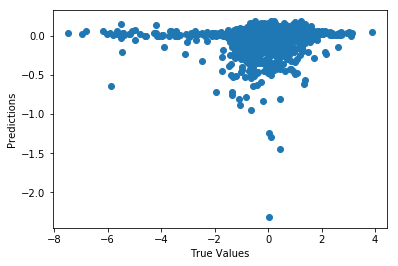

In [201]:


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=24)


lm = LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)
plt.scatter(y_test, predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')


In [197]:
model.coef_

array([-0.11208235,  0.15855574, -0.05840454, -0.03562695,  0.08150061,
       -0.11784127,  0.0692439 ])

In [198]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = math.sqrt(mse)

print(f'Training score: {model.score(X_train, y_train)}')
print(f'Test score: {model.score(X_test, y_test)}')
print(f'RMSE: {rmse}')

Training score: 0.05308576325795855
Test score: 0.02977456605095463
RMSE: 1.0057191616823538


In [199]:
alpha = 0.1
model = Ridge(alpha=alpha)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = math.sqrt(mse)

print(f'Ridge Regression (alpha={alpha})')
print(f'Training score: {model.score(X_train, y_train)}')
print(f'Test score: {model.score(X_test, y_test)}')
print(f'RMSE: {rmse}')
print()


Ridge Regression (alpha=0.1)
Training score: 0.05308576317806879
Test score: 0.029775576214155608
RMSE: 1.0057186381232321



In [200]:
import numpy as np
import pandas as pd
import csv
import math
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from statistics import mean, stdev

chi_data = pd.read_csv('transformed_data.csv', index_col=0, parse_dates=True).drop_duplicates()

def deseasonalize(data, period):
    decomp = seasonal_decompose(data, model='additive', extrapolate_trend='freq', freq=period)
    return data - decomp.seasonal
    
targets = chi_data[['bus', 'rail_boardings', 'total_rides']]
features = chi_data[['is_sat','is_holi','avg_precip','temp_mid','temp_rng',
                  'temp_bs','hum_mid','hum_rng','wind_mid','wind_rng','pres_mid','pres_rng']]

target_series = [pd.Series(deseasonalize(deseasonalize(targets[t], 7), 365), name=t) for t in targets]
feature_series = [pd.Series(deseasonalize(features[f], 365), name=f) for f in features]

ds_chi_data = pd.concat(target_series+feature_series, axis=1)

scaler = StandardScaler()
scaled_ds_chi_data = pd.DataFrame(data=scaler.fit_transform(ds_chi_data), columns=ds_chi_data.columns, index=ds_chi_data.index)

y = scaled_ds_chi_data['total_rides']
X = scaled_ds_chi_data[['avg_precip']]#,'temp_mid','temp_rng',
#                   'hum_mid','hum_rng','wind_mid','wind_rng']]

# X = scaled_ds_chi_data[['is_sat','is_holi','avg_precip','temp_mid','temp_rng',
#                   'temp_bs','hum_mid','hum_rng','wind_mid','wind_rng','pres_mid','pres_rng']]



In [190]:
scaled_ds_chi_data

,bus,rail_boardings,total_rides,is_sat,is_holi,avg_precip,temp_mid,temp_rng,temp_bs,hum_mid,hum_rng,wind_mid,wind_rng,pres_mid,pres_rng
2001-01-01,-2.983286,-3.435620,-4.016927,-0.319427,1.844941,-0.147028,-1.461008,0.170848,1.068834,0.033321,-0.032811,-0.671539,-1.113312,2.254649,-1.626348
2001-01-02,0.890799,0.105209,0.674790,-0.159721,-0.768854,-0.379888,-1.728784,-0.046172,0.030659,0.631330,-0.934512,-0.599384,-0.692424,2.173765,-0.193971
2001-01-03,1.351689,0.462069,1.196263,-0.319365,-0.923032,-0.032868,-0.846277,0.851776,-0.872890,1.344828,-0.532568,0.005780,-0.150952,0.273838,0.426952
2001-01-04,1.762778,0.774055,1.657789,-0.478572,-1.230546,-0.128124,0.297993,-0.485598,-2.318268,1.691663,-1.179636,0.042810,0.898420,-1.516565,2.863232
2001-01-05,0.916667,0.004144,0.635051,-0.478572,-0.615098,0.805058,0.575953,-0.055580,2.154143,0.189582,-0.487617,0.508024,1.045152,-2.182480,0.919814
2001-01-06,0.937226,-0.503169,0.360141,2.394587,-0.615098,0.043082,0.118172,0.746678,-0.375139,0.323897,-0.502359,0.057884,0.762958,-1.650748,-0.464420
2001-01-07,0.198495,-0.700354,-0.262106,-0.319365,2.306277,-0.045827,0.235703,-0.571642,1.070556,0.382646,0.183962,-0.311067,-0.906901,-0.952515,-0.037908
2001-01-08,1.432690,0.203443,1.104788,-0.319365,-0.307585,-0.119922,-0.562085,-0.361534,-1.097590,-0.120677,-0.061407,-0.311001,-1.087342,0.659883,-0.056810
2001-01-09,1.047471,-0.019696,0.711747,-0.319365,-0.307585,-0.382352,-0.686370,0.230787,-1.187902,0.467930,-0.311642,-0.244631,-0.534402,1.549351,-1.018979
2001-01-10,1.128807,-0.010242,0.773274,-0.479009,-0.307585,0.000636,0.487268,0.775576,-0.148763,0.426622,-0.424205,0.065547,-0.692341,0.030569,-1.862664


In [180]:

num_folds = 5

kfold = KFold(num_folds, True, 34)
# kfold_split = kfold.split(new_chi_data)

alpha_exps = np.linspace(-2,5,15)
L1L2_ratios = np.linspace(0,1,21)
L1L2_ratios[0] = 0.01
# model_grid = {round(alpha_exp,3):
#               {round(L1L2_ratio,3): [] for L1L2_ratio in L1L2_ratios}
#                   for alpha_exp in alpha_exps}

grid = {round(alpha_exp,3):
            {round(L1L2_ratio,3): 
                {'models': [],
                 'MSEs': [],
                 'RMSEs': [],
                 'resids': [],
                 'training_scores': [],
                 'test_scores': []}
                    for L1L2_ratio in L1L2_ratios}
                        for alpha_exp in alpha_exps}


for alpha_exp in grid:
    alpha = pow(10,alpha_exp)
    for L1L2_ratio in grid[alpha_exp]:
        # experiment = grid[alpha_exp][L1L2_ratio]
        # print(f'running experiment with alpha_exp={alpha_exp} and L1L2_ratio={L1L2_ratio}')
        for train, test in kfold.split(y):
            # print(len(train), len(test))
            X_train = X.iloc[train]
            X_test = X.iloc[test]
            y_train = y.iloc[train]
            y_test = y.iloc[test]

            model = ElasticNet(alpha=alpha, l1_ratio=L1L2_ratio, random_state=34)
            model.fit(X_train, y_train)
            
            y_pred = model.predict(X_test)
            resids = [y_p - y_t for y_p, y_t in zip(y_pred,y_test)]
            mse = mean_squared_error(y_test, y_pred)
            rmse = math.sqrt(mse)

            training_score = model.score(X_train, y_train)
            test_score = model.score(X_test, y_test)

            grid[alpha_exp][L1L2_ratio]['models'].append(model)
            grid[alpha_exp][L1L2_ratio]['MSEs'].append(mse)
            grid[alpha_exp][L1L2_ratio]['RMSEs'].append(rmse)
            grid[alpha_exp][L1L2_ratio]['resids'].append(resids)
            grid[alpha_exp][L1L2_ratio]['training_scores'].append(training_score)
            grid[alpha_exp][L1L2_ratio]['test_scores'].append(test_score)
    

In [181]:
def contour_plot(x_values, y_values, z_values, levels=None):
    plt.title('Contour plot')
    plt.xlabel('X')
    plt.ylabel('Y')

    if levels:
        # Create contour lines or level curves using matplotlib.pyplot module
        contours = plt.contour(x_values, y_values, z_values, levels)
    else:
        contours = plt.contour(x_values, y_values, z_values)

    # Display z values on contour lines
    plt.clabel(contours, inline=1, fontsize=10)

    plt.show()
    

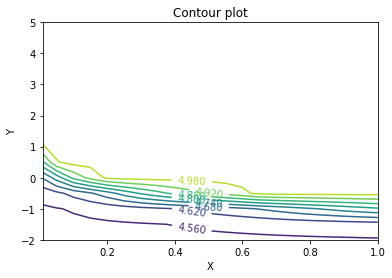

In [183]:
y_values = alpha_exps
x_values = L1L2_ratios
z_values = np.ndarray((len(y_values),len(x_values)))

x_counter = 0
for alpha_exp in grid:
    y_counter = 0
    for L1L2_ratio in grid[alpha_exp]:
        data = grid[alpha_exp][L1L2_ratio]['MSEs']
        z_values[x_counter][y_counter] = sum(data)
        y_counter += 1
    x_counter += 1

levels = [0.3, 0.6, 0.7, 0.8, 0.85, 0.87, 0.88, 0.89, 0.9]
levels = [0.581, 0.59, 0.6, 0.7]
contour_plot(x_values, y_values, z_values)#, levels)

Index(['bus', 'rail_boardings', 'total_rides', 'is_sat', 'is_holi',
       'avg_precip', 'temp_mid', 'temp_rng', 'temp_bs', 'hum_mid', 'hum_rng',
       'wind_mid', 'wind_rng', 'pres_mid', 'pres_rng'],
      dtype='object')


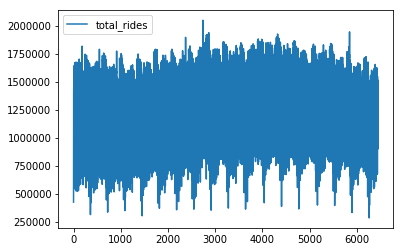

In [160]:
print(chi_data.columns)
ts = chi_data['total_rides']#.iloc[20:160:]
ts.reset_index().plot()

In [161]:
print(ts.std())
print(ts.diff().std())
print(ts.diff().diff().std())
print(ts.diff().diff().diff().std())

391261.25268640416
433748.2432994117
623044.57244117
1012520.7790795874


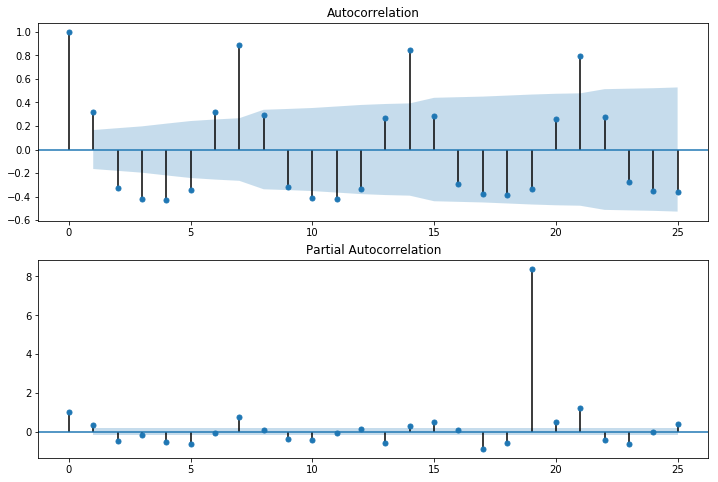

In [156]:
import statsmodels.api as sm
# import matplotlib.pyplot as plt
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(ts, lags=25, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(ts, lags=25, ax=ax2)
plt.show()

In [27]:
# scaler.inverse_transform(X and y...)


y_values = alpha_exps
x_values = L1L2_ratios
z_values = np.ndarray((len(x_values),len(y_values)))

x_counter = 0
for alpha_exp in grid:
    y_counter = 0
    for L1L2_ratio in grid[alpha_exp]:
        data = grid[alpha_exp][L1L2_ratio]['test_scores']
        z_values[x_counter][y_counter] = mean(data)
        _counter += 1
    x_counter += 1

contour_plot(x_values, y_values, z_values)

{-2.0: {0.01: 0.8837456437589574,
  0.05: 0.8837502180461448,
  0.1: 0.883748171749512,
  0.15: 0.8837423169662276,
  0.2: 0.8837303052751262,
  0.25: 0.883713879296133,
  0.3: 0.8836927146059499,
  0.35: 0.8836667659410551,
  0.4: 0.8836371046751018,
  0.45: 0.8836040131492812,
  0.5: 0.8835671931176851,
  0.55: 0.8835261122894993,
  0.6: 0.8834810107086535,
  0.65: 0.8834324149388022,
  0.7: 0.8833800709880442,
  0.75: 0.8833240570781479,
  0.8: 0.8832687241664194,
  0.85: 0.88321583567098,
  0.9: 0.8831600983303501,
  0.95: 0.8831008940208636,
  1.0: 0.8830382959064152},
 -1.5: {0.01: 0.8826703755954595,
  0.05: 0.8826197949650039,
  0.1: 0.8825168562297896,
  0.15: 0.8823783659144834,
  0.2: 0.8822031218026415,
  0.25: 0.8819988395437267,
  0.3: 0.8817881533906166,
  0.35: 0.8815471434022994,
  0.4: 0.8813136699556752,
  0.45: 0.8811046680955348,
  0.5: 0.8808792025869594,
  0.55: 0.8806358526176649,
  0.6: 0.8803739746952095,
  0.65: 0.8800943879011239,
  0.7: 0.8797969696530974,


In [6]:
import statistics
dir(statistics)

['Decimal',
 'Fraction',
 'StatisticsError',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '_coerce',
 '_convert',
 '_counts',
 '_exact_ratio',
 '_fail_neg',
 '_find_lteq',
 '_find_rteq',
 '_isfinite',
 '_ss',
 '_sum',
 'bisect_left',
 'bisect_right',
 'collections',
 'groupby',
 'harmonic_mean',
 'math',
 'mean',
 'median',
 'median_grouped',
 'median_high',
 'median_low',
 'mode',
 'numbers',
 'pstdev',
 'pvariance',
 'stdev',
 'variance']

In [20]:
len(scaled_chi_data[:,0:3])

6450

In [127]:
# define helper plot function for visualization
import statsmodels.tsa.api as smt
import seaborn as sns

def plots(data, lags=None):
    layout = (1, 3)
    raw  = plt.subplot2grid(layout, (0, 0))
    acf  = plt.subplot2grid(layout, (0, 1))
    pacf = plt.subplot2grid(layout, (0, 2))
    
    data.plot(ax=raw)
    smt.graphics.plot_acf(data, lags=lags, ax=acf)
    smt.graphics.plot_pacf(data, lags=lags, ax=pacf)
    sns.despine()
    plt.tight_layout()

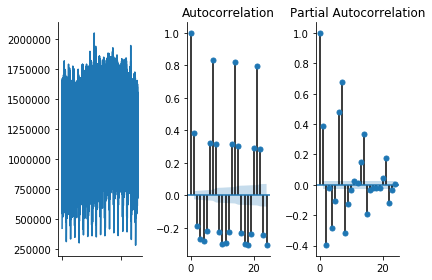

In [128]:
plots(chi_data['total_rides'], lags=24);

In [130]:
import statsmodels.api as sm

# fit SARIMA monthly based on helper plots
sar = sm.tsa.statespace.SARIMAX(chi_data['total_rides'], order=(1,1,0), seasonal_order=(0,1,0,7), trend='c').fit()
sar.summary()

C:\Users\Grazillionaire\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                
=========================================================================================
Dep. Variable:                       total_rides   No. Observations:                 6450
Model:             SARIMAX(1, 1, 0)x(0, 1, 0, 7)   Log Likelihood              -88670.269
Date:                           Sun, 01 Sep 2019   AIC                         177346.537
Time:                                   15:44:18   BIC                         177366.849
Sample:                                        0   HQIC                        177353.566
                                          - 6450                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    -76.4678   2861.564     -0.027      0.979   -5685.031    5532.095
ar.L1         -0.3363      0.007    -50.588      0.000      -0.349      -0.323
sigma2       5.28e+10      0.001   7.65e+13      0.000    5.28e+10    5.28e+10
===================================================================================
Ljung-Box (Q):                     2218.43   Jarque-Bera (JB):             18234.80
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.02   Skew:                             0.11
Prob(H) (two-sided):                  0.63   Kurtosis:                        11.24
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.56e+29. Standard errors may be unstable.
"""

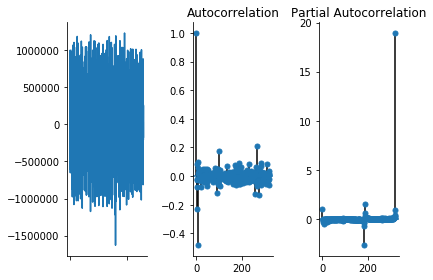

In [143]:
plots(sar.resid, lags=320);

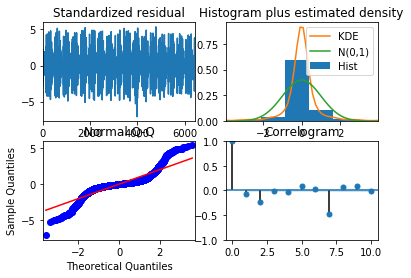

In [144]:
sar.plot_diagnostics();